## Session Objectives

In this programming lab, we will be exploring how to use a package called Tenserflow to build our first neural network to predict if house prices are above or below median value. In particular, we will go through the full Deep Learning pipeline, from:

* Exploring and Processing the Data
* Building and Training our Neural Network
* Visualizing Loss and Accuracy
* Adding Regularization to our Neural Network

## Pre-requisites

This programming lab assumes you’ve got Jupyter notebook set up with an environment that has the following packages 
* keras "2.10.0"
* tensorflow "2.10.0"
* pandas
* scikit-learn "1.2.2"
* matplotlib "3.5.1"

# Exploring and Processing the Data

Before we code any ML algorithm, the first thing we need to do is to put our data in a format that the algorithm will want. In particular, we need to:

* Read in the CSV (comma separated values) file and convert them to arrays. Arrays are a data format that our algorithm can process.
* Split our dataset into the input features (which we call x) and the label (which we call y).
* Scale the data (we call this normalization) so that the input features have similar orders of magnitude.
* Split our dataset into the training set, the validation set and the test set. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./input/housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Here, you can explore the data a little. We have our input features in the first ten columns:

* Lot Area (in sq ft)
* Overall Quality (scale from 1 to 10)
* Overall Condition (scale from 1 to 10)
* Total Basement Area (in sq ft)
* Number of Full Bathrooms
* Number of Half Bathrooms
* Number of Bedrooms above ground
* Total Number of Rooms above ground
* Number of Fireplaces
* Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:

* Is the house price above the median or not? (1 for yes and 0 for no)
Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

    The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [4]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y.

In [5]:
X = dataset[:,0:10]
Y = dataset[:,10]

The next step in our processing is to make sure that the scale of the input features are similar. Right now, features such as lot area are in the order of the thousands, a score for overall quality is ranged from 1 to 10, and the number of fireplaces tend to be 0, 1 or 2.

This makes it difficult for the initialization of the neural network, which causes some practical problems. One way to scale the data is to use an existing package from scikit-learn.

In [6]:
from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Now, we are down to our last step in processing the data, which is to split our dataset into a training set, a validation set and a test set.

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [12]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In summary, we now have a total of six variables for our datasets we will use:

* X_train (10 input features, 70% of full dataset)
* X_val (10 input features, 15% of full dataset)
* X_test (10 input features, 15% of full dataset)
* Y_train (1 label, 70% of full dataset)
* Y_val (1 label, 15% of full dataset)
* Y_test (1 label, 15% of full dataset)

# Building and Training Our First Neural Network

As we know, Machine Learning consists of two steps. The first step is to specify a template (an architecture) and the second step is to find the best numbers from the data to fill in that template. Our code from here on will also follow these two steps.

## First Step: Setting up the Architecture

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:

<figure style="padding: 1em;">
<img src="https://cdn-media-1.freecodecamp.org/images/H3eAYjXcA2asaCjCYrVT7lc2IIBQGQWzQlPG" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Neural network architecture that we will use for our problem</center></figcaption>
</figure>

In words, we want to have these layers:

* Hidden layer 1: 32 neurons, ReLU activation
* Hidden layer 2: 32 neurons, ReLU activation
* Output Layer: 1 neuron, Sigmoid activation

Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [16]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

And just like that, the code snippet above has defined our architecture! The code above can be interpreted like this:

**model = Sequential([ ... ])**

This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.

**Dense(32, activation='relu', input_shape=(10,)),**

We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.

**Dense(32, activation='relu'),**

Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.

**Dense(1, activation='sigmoid'),**

Our third layer is a dense layer with 1 neuron, sigmoid activation.

And just like that, we have written our model architecture (template) in code!


## Second Step: Filling in the best number


Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We put the following settings inside the brackets after model.compile:

optimizer='sgd'

‘sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent), which we’ve seen in Intuitive Deep Learning Part 1b.

loss='binary_crossentropy'

The loss function for outputs that take the values 1 or 0 is called binary cross entropy.

metrics=['accuracy']

Lastly, we want to track accuracy on top of the loss function. Now once we’ve run that cell, we are ready to train!



Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [19]:
hist = model.fit(X_train, Y_train,
            batch_size=32, epochs=100,
            validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 14ms/step - loss: 0.7215 - accuracy: 0.5020 - val_loss: 0.7208 - val_accuracy: 0.4612
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7103 - accuracy: 0.5000 - val_loss: 0.7093 - val_accuracy: 0.4612
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7021 - accuracy: 0.4980 - val_loss: 0.7010 - val_accuracy: 0.4566
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.4863 - val_loss: 0.6946 - val_accuracy: 0.4521
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.5323 - val_loss: 0.6889 - val_accuracy: 0.5616
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.7016 - val_loss: 0.6837 - val_accuracy: 0.6941
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6800 - accuracy: 0.7495 - val_loss: 0.6786 - val_accuracy: 0.7534
Epoch 8/100


You can now see that the model is training! By looking at the numbers, you should be able to see the loss decrease and the accuracy increase over time. At this point, you can experiment with the hyper-parameters and neural network architecture. Run the cells again to see how your training has changed when you’ve tweaked your hyperparameters.

Once you’re happy with your final model, we can evaluate it on the test set. To find the accuracy on our test set, we run this code snippet:

In [20]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.8995


0.8995434045791626

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

Due to the randomness in how we have split the dataset as well as the initialization of the weights, the numbers and graph will differ slightly each time we run our notebook. Nevertheless, you should get a test accuracy anywhere between 80% to 95% if you’ve followed the architecture I specified above!

**Summary:** Coding up our first neural network required only a few lines of code:

We specify the architecture with the Keras Sequential model.
We specify some of our settings (optimizer, loss function, metrics to track) with model.compile
We train our model (find the best parameters for our architecture) with the training data with model.fit
We evaluate our model on the test set with model.evaluate

# Visualizing Loss and Accuracy

In [21]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

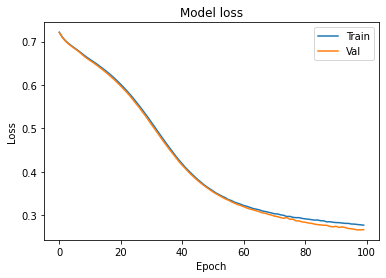

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We’ll explain each line of the above code snippet. The first two lines says that we want to plot the loss and the val_loss. The third line specifies the title of this graph, “Model Loss”. The fourth and fifth line tells us what the y and x axis should be labelled respectively. The sixth line includes a legend for our graph, and the location of the legend will be in the upper right. And the seventh line tells Jupyter notebook to display the graph.

We can do the same to plot our training accuracy and validation accuracy with the code below:|

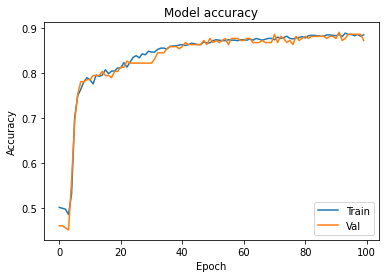

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Since the improvements in our model to the training set looks somewhat matched up with improvements to the validation set, it doesn’t seem like overfitting is a huge problem in our model.

**Summary:** We use matplotlib to visualize the training and validation loss / accuracy over time to see if there’s overfitting in our model.

# Adding Regularization to our Neural Network

For the sake of introducing regularization to our neural network, let’s formulate with a neural network that will badly overfit on our training set. We’ll call this Model 2.

So, basically we will train a model which will overfit.

In [26]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 69ms/step - loss: 0.4784 - accuracy: 0.7642 - val_loss: 0.3282 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 2s 58ms/step - loss: 0.3595 - accuracy: 0.8532 - val_loss: 0.3133 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 2s 57ms/step - loss: 0.3182 - accuracy: 0.8669 - val_loss: 0.2632 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 61ms/step - loss: 0.2989 - accuracy: 0.8738 - val_loss: 0.2936 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 2s 57ms/step - loss: 0.2855 - accuracy: 0.8767 - val_loss: 0.2570 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 2s 58ms/step - loss: 0.2763 - accuracy: 0.8816 - val_loss: 0.2354 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 2s 63ms/step - loss: 0.2889 - accuracy: 0.8699 - val_loss: 0.2882 - val_accuracy: 0.9224
Epoch 

Here, we’ve made a much larger model and we’ve use the Adam optimizer. Adam is one of the most common optimizers we use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster. If we run this code and plot the loss graphs for hist_2 using the code below (note that the code is the same except that we use ‘hist_2’ instead of ‘hist’):

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

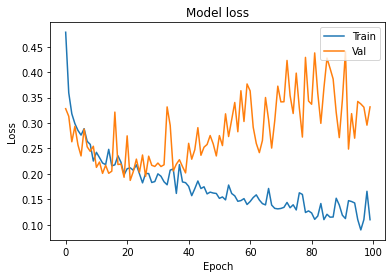

In [27]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

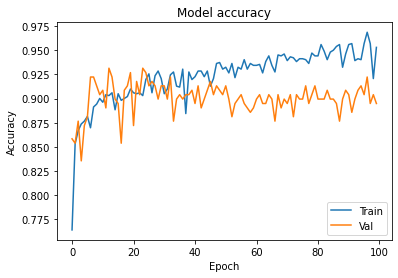

In [29]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Now, let’s try out some of our strategies to reduce over-fitting (apart from changing our architecture back to our first model).

we’ll incorporate L2 regularization and dropout here. The reason we don’t add early stopping here is because after we’ve used the first two strategies, the validation loss doesn’t take the U-shape we see above and so early stopping will not be as effective.

In [1]:
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras import regularizers

In [31]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 6s 111ms/step - loss: 14.2502 - accuracy: 0.6683 - val_loss: 3.8698 - val_accuracy: 0.8037
Epoch 2/100
32/32 [==============================] - 3s 84ms/step - loss: 1.6753 - accuracy: 0.8503 - val_loss: 0.7018 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 2s 74ms/step - loss: 0.5750 - accuracy: 0.8523 - val_loss: 0.5112 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 2s 76ms/step - loss: 0.5021 - accuracy: 0.8816 - val_loss: 0.4578 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 2s 75ms/step - loss: 0.5166 - accuracy: 0.8581 - val_loss: 0.4875 - val_accuracy: 0.9224
Epoch 6/100
32/32 [==============================] - 3s 81ms/step - loss: 0.5037 - accuracy: 0.8581 - val_loss: 0.4398 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 2s 74ms/step - loss: 0.4764 - accuracy: 0.8728 - val_loss: 0.4382 - val_accuracy: 0.8676
Epoc

Can you spot the differences between Model 3 and Model 2? There are two main differences:

**Difference 1:** To add L2 regularization, notice that we’ve added a bit of extra code in each of our dense layers like this:

kernel_regularizer=regularizers.l2(0.01)

This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.

**Difference 2:** To add Dropout, we added a new layer like this:

Dropout(0.3),

This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. Let’s compile it and run it with the same parameters as our Model 2 (the overfitting one):

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

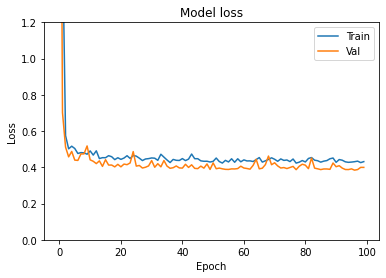

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

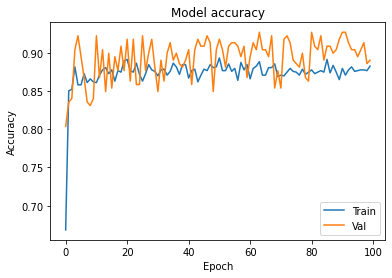

In [34]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Compared to our model in Model 2, we’ve reduced overfitting substantially! And that’s how we apply our regularization techniques to reduce overfitting to the training set.

**Summary:** To deal with overfitting, we can code in the following strategies into our model each with about one line of code:

* L2 Regularization
* Dropout

---




*Have questions or comments? Feel free to reach out to me (S.Lamchoudi@aui.ma).*